In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams["figure.figsize"] = (10,10)
plt.style.use("ggplot")
list_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

In [3]:
suicide_csv = "../csvs/suicide.csv"
hdi_csv = "../csvs/hdi.csv"
country_continent_csv = "../csvs/countryContinent.csv"
total_population_csv = "../csvs/totalPopulationCountries.csv"
users_internet_csv = "../csvs/totalUsersInternet.csv"
gender_inequality_csv = "../csvs/genderInequality.csv"
employmentto_population_csv = "../csvs/employmenttoPopulationRatio(%ages15andOlder).csv"
positive_negative_csv = "../csvs/positiveNegativeData.csv"
climate_russia_csv = "../csvs/climateRussia.csv"
climate_sweden_csv = "../csvs/climateSweden.csv"

In [4]:
#Lendo csv.
suicide_df = pd.read_csv(suicide_csv)
hdi_df = pd.read_csv(hdi_csv, sep=";")
country_continent_df = pd.read_csv(country_continent_csv)
total_population_df = pd.read_csv(total_population_csv)
users_internet_df = pd.read_csv(users_internet_csv, sep=";")
gender_inequality_df = pd.read_csv(gender_inequality_csv)
employmentto_population_df = pd.read_csv(employmentto_population_csv)
positive_negative_df = pd.read_csv(positive_negative_csv, sep=";")
climate_russia_df = pd.read_csv(climate_russia_csv)
climate_sweden_df = pd.read_csv(climate_sweden_csv)

In [5]:
#Fazendo cópias do Dataframe para trabalhar com as cópias.
suicide = suicide_df.copy()
hdi = hdi_df.copy()
country_continent = country_continent_df.copy()
total_population = total_population_df.copy()
users_internet = users_internet_df.copy()
gender_inequality = gender_inequality_df.copy()
employmentto_population = employmentto_population_df.copy()
positive_negative = positive_negative_df.copy()
climate_russia = climate_russia_df.copy()
climate_sweden = climate_sweden_df.copy()

In [6]:
#Fazendo drop em colunas que não serão ultilizadas.
suicide.drop("HDI for year", axis=1, inplace=True)
suicide.drop("country-year", axis=1, inplace=True)
suicide.drop("generation", axis=1, inplace=True)
country_continent.drop("code_2", axis=1, inplace=True)
country_continent.drop("code_3", axis=1, inplace=True)
country_continent.drop("country_code", axis=1, inplace=True)
country_continent.drop("iso_3166_2", axis=1, inplace=True)
country_continent.drop("region_code", axis=1, inplace=True)
country_continent.drop("sub_region_code", axis=1, inplace=True)
positive_negative.drop("Life Ladder", axis=1, inplace=True)
positive_negative.drop("Log GDP per capita", axis=1, inplace=True)
positive_negative.drop("Social support", axis=1, inplace=True)
positive_negative.drop("Healthy life expectancy at birth", axis=1, inplace=True)
positive_negative.drop("Freedom to make life choices", axis=1, inplace=True)
positive_negative.drop("Generosity", axis=1, inplace=True)
positive_negative.drop("Perceptions of corruption", axis=1, inplace=True)
positive_negative.drop("Confidence in national government", axis=1, inplace=True)
positive_negative.drop("Democratic Quality", axis=1, inplace=True)
positive_negative.drop("Delivery Quality", axis=1, inplace=True)
positive_negative.drop("Standard deviation of ladder by country-year", axis=1, inplace=True)
positive_negative.drop("Standard deviation/Mean of ladder by country-year", axis=1, inplace=True)
positive_negative.drop("GINI index (World Bank estimate)", axis=1, inplace=True)
positive_negative.drop("GINI index (World Bank estimate), average 2000-16", axis=1, inplace=True)
positive_negative.drop("gini of household income reported in Gallup, by wp5-year", axis=1, inplace=True)
positive_negative.drop("Most people can be trusted, Gallup", axis=1, inplace=True)
positive_negative.drop("Most people can be trusted, WVS round 1981-1984", axis=1, inplace=True)
positive_negative.drop("Most people can be trusted, WVS round 1989-1993", axis=1, inplace=True)
positive_negative.drop("Most people can be trusted, WVS round 1994-1998", axis=1, inplace=True)
positive_negative.drop("Most people can be trusted, WVS round 1999-2004", axis=1, inplace=True)
positive_negative.drop("Most people can be trusted, WVS round 2005-2009", axis=1, inplace=True)
positive_negative.drop("Most people can be trusted, WVS round 2010-2014", axis=1, inplace=True)
climate_russia.drop("ISO3", axis=1, inplace=True)
climate_sweden.drop("ISO3", axis=1, inplace=True)

In [7]:
#Junatando suicidio com continentes, para obter os nomes dos continentes e sub-regiões.
add_continent = pd.merge(suicide,country_continent,on=["country"], how="inner")

#Juntando continentes(gerado no merge anterior) com o idh, para obter a coluna de idh.
add_hdi = pd.merge(add_continent,hdi, on=["country","year"], how="inner")

#Adicionando a coluna de população total.
add_total_population = pd.merge(add_hdi,total_population, on=["country","year"], how="inner")

#Adicionando a coluna de total de usuários de internet.
add_users_internet = pd.merge(add_total_population, users_internet,on=["country","year"], how="inner")

#Adicionando a coluna de desigualdade de gênero.
add_gender_inequality = pd.merge(add_users_internet, gender_inequality,on=["country","year"], how="inner")

#Adicionando a coluna de taxa de empregados a partir de 15 anos.
add_employmentto_population = pd.merge(add_gender_inequality,employmentto_population,on=["country","year"], how="inner")

#Adicionando a coluna de afeto positivo e afeto negativo.
result = pd.merge(add_employmentto_population, positive_negative,on=["country","year"], how="inner")

In [8]:
russia_df= result[(result["country"] == "Russian Federation")]
sweden_df= result[(result["country"] == "Sweden") & (result["year"] > 2005)]

In [9]:
cr = climate_russia.groupby(["year","country"], as_index=False).median()
cs = climate_sweden.groupby(["year","country"], as_index=False).median()

In [10]:
russia = pd.merge(russia_df,cr,on=["country","year"], how="inner")
sweden = pd.merge(sweden_df,cs,on=["country","year"], how="inner")

In [11]:
gr = russia.groupby(["year","country","sex"], as_index=False).sum()
gs = sweden.groupby(["year","country","sex"], as_index=False).sum()

In [68]:
myGroup = pd.merge(russia,sweden, how="outer")
myGroup_sum = myGroup.groupby(["year","country","totalPopulation", "hdi"], as_index=False).sum()
myGroup.head()

,country,year,sex,age,suicides_no,population,suicides/100kpop,gdp-year,gdp-per-capita,continent,sub_region,hdi,totalPopulation,totalUsersInternet,genderInequality,rateEmployment15andOlder,positiveAffect,negativeAffect,temperature-(celsius)
0,Russian Federation,2010,male,75+ years,1506,2023458,74.43,"1,524,916,112,079",11307,Europe,Eastern Europe,0.78,142849449.0,43.0,311.0,58.4,0.588975,0.171421,-4.6272
1,Russian Federation,2010,male,25-34 years,6508,11398127,57.10,"1,524,916,112,079",11307,Europe,Eastern Europe,0.78,142849449.0,43.0,311.0,58.4,0.588975,0.171421,-4.6272
2,Russian Federation,2010,male,35-54 years,10304,19786280,52.08,"1,524,916,112,079",11307,Europe,Eastern Europe,0.78,142849449.0,43.0,311.0,58.4,0.588975,0.171421,-4.6272
3,Russian Federation,2010,male,55-74 years,5178,11174530,46.34,"1,524,916,112,079",11307,Europe,Eastern Europe,0.78,142849449.0,43.0,311.0,58.4,0.588975,0.171421,-4.6272
4,Russian Federation,2010,male,15-24 years,3934,10546669,37.30,"1,524,916,112,079",11307,Europe,Eastern Europe,0.78,142849449.0,43.0,311.0,58.4,0.588975,0.171421,-4.6272


In [13]:
#Pegando os países por suas sub-regiões.
australia_newzeland = result[(result["sub_region"] == "Australia and New Zealand")]
caribbean = result[(result["sub_region"] == "Caribbean")]
central_america = result[(result["sub_region"] == "Central America")]
central_asia = result[(result["sub_region"] == "Central Asia")]
eastern_africa = result[(result["sub_region"] == "Eastern Africa")]
eastern_asia = result[(result["sub_region"] == "Eastern Asia")]
eastern_europe = result[(result["sub_region"] == "Eastern Europe")]
melanesia = result[(result["sub_region"] == "Melanesia")]
micronesia = result[(result["sub_region"] == "Micronesia")]
northern_america = result[(result["sub_region"] == "Northern America")]
northern_europe = result[(result["sub_region"] == "Northern Europe")]
south_america = result[(result["sub_region"] == "South America")]
south_eastern_asia = result[(result["sub_region"] == "South-Eastern Asia")]
southern_africa = result[(result["sub_region"] == "Southern Africa")]
southern_asia = result[(result["sub_region"] == "Southern Asia")]
southern_europe = result[(result["sub_region"] == "Southern Europe")]
western_africa = result[(result["sub_region"] == "Western Africa")]
western_asia = result[(result["sub_region"] == "Western Asia")]
western_europe = result[(result["sub_region"] == "Western Europe")]

In [14]:
#Pegando os países por continentes
africa = result[(result["continent"] == "Africa")]
americas = result[(result["continent"] == "Americas")]
asia = result[(result["continent"] == "Asia")]
europe = result[(result["continent"] == "Europe")]
Oceania = result[(result["continent"] == "Oceania")]

In [15]:
group_sa = south_america.groupby(["year","country","hdi"], as_index=False).sum()
group_ee = eastern_europe.groupby(["year","country","hdi"], as_index=False).sum()

In [16]:
#Função para colocar valores nulos.
#Substitui valores nulos por 0
#Primeira apresentação
def insert_zero(df,start = 2000, end = 2016):
    country_list = list(df["country"].unique())
    for year in range(start,end):
        for country in country_list:
            if len(df[(df["country"] == country) & (df["year"] == year)]) == 0:
                df2 = pd.DataFrame({"country": [country], "year": [year], "hdi" : [0]})
                df = df.append(df2, ignore_index=True)
    return df


In [17]:
#Atribuindo os valores nulos ao dataframe.
#group_sa = insert_zero(group_sa)
#group_ee = insert_zero(group_ee)

In [18]:
def axis_x_center(length=1):
    start = -(length//2) if length%2 == 0 else -((length//2))
    end = (length//2) if length%2 == 0 else ((length//2)+1)
    
    return [x for x in range(start, end)]

In [19]:
#TESTE
#country_list = list(group_sa["country"].unique())
#country_hdi = list(group_sa["hdi"][group_sa["country"] == "Argentina"])
#country_year = list(group_sa["year"].unique())

In [20]:
#Função para gerar gráfico de idh.
#Primeira apresentação
''' def gerar_grafico_idh(df, axis_y, axis_x, title,wd = 0.15, start = 2000, end = 2016):
    global list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    df = df[(df["year"]>= start) & (df["year"] < end)]
    
    country_name = list(df["country"].unique())
    country_year = np.asarray([x for x in range(start,end)])
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-11)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_hdi = list(df["hdi"][df["country"] == country_name[index]])
        print(country_hdi)
        country_hdi = np.asarray(country_hdi)
        ax.bar(country_year+(wd*list_num[index]), country_hdi, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show() '''

' def gerar_grafico_idh(df, axis_y, axis_x, title,wd = 0.15, start = 2000, end = 2016):\n    global list_colors\n    \n    plt.ylabel(axis_y)\n    plt.xlabel(axis_x)\n    plt.title(title)\n    ax = plt.subplot()\n    df = df[(df["year"]>= start) & (df["year"] < end)]\n    \n    country_name = list(df["country"].unique())\n    country_year = np.asarray([x for x in range(start,end)])\n    \n    list_num = axis_x_center(len(country_name))\n    plt.xlim(country_year[0]+(wd*(list_num[0]-11)), country_year[-1]+(wd*(list_num[-1]+2)))\n    plt.xticks(country_year)\n    \n    for index in range(len(country_name)):\n        country_hdi = list(df["hdi"][df["country"] == country_name[index]])\n        print(country_hdi)\n        country_hdi = np.asarray(country_hdi)\n        ax.bar(country_year+(wd*list_num[index]), country_hdi, width=wd, align="center", label=country_name[index], color=list_colors[index])\n        ax.legend(loc="upper left")\n\n\n    plt.show() '

In [21]:
#Função para gerar gráfico de taxa de suicídio.
#Primeira apresentação
'''
def gerar_grafico_suicide(df, axis_y, axis_x, title,wd = 0.15, start = 2000, end = 2016):
    global list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    df = df[(df["year"]>= start) & (df["year"] < end)]
    
    country_name = list(df["country"].unique())
    country_year = np.asarray([x for x in range(start,end)])
    
    list_num = axis_x_center(len(country_name)) 
    plt.xlim(country_year[0]+(wd*(list_num[0]-11)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list((df["suicides_no"][df["country"] == country_name[index]]/ df["population"][df["country"] == country_name[index]])*100000)
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()'''

'\ndef gerar_grafico_suicide(df, axis_y, axis_x, title,wd = 0.15, start = 2000, end = 2016):\n    global list_colors\n    \n    plt.ylabel(axis_y)\n    plt.xlabel(axis_x)\n    plt.title(title)\n    ax = plt.subplot()\n    df = df[(df["year"]>= start) & (df["year"] < end)]\n    \n    country_name = list(df["country"].unique())\n    country_year = np.asarray([x for x in range(start,end)])\n    \n    list_num = axis_x_center(len(country_name)) \n    plt.xlim(country_year[0]+(wd*(list_num[0]-11)), country_year[-1]+(wd*(list_num[-1]+2)))\n    plt.xticks(country_year)\n    \n    for index in range(len(country_name)):\n        country_list = list((df["suicides_no"][df["country"] == country_name[index]]/ df["population"][df["country"] == country_name[index]])*100000)\n        country_list = np.asarray(country_list)\n        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])\n        ax.legend(loc="upper left")\

In [22]:
def gerar_grafico_suicide_gen(df, axis_y, axis_x, title,wd = 0.15):
    global list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_sex = list(df["sex"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_sex)) 
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3)))
    plt.xticks(country_year)
    
    for index in range(len(country_sex)):
        country_list = list((df["suicides_no"][df["sex"] == country_sex[index]]/df["population"][df["sex"] == country_sex[index]])*100000)
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_sex[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show()
    

C:\Users\evele\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


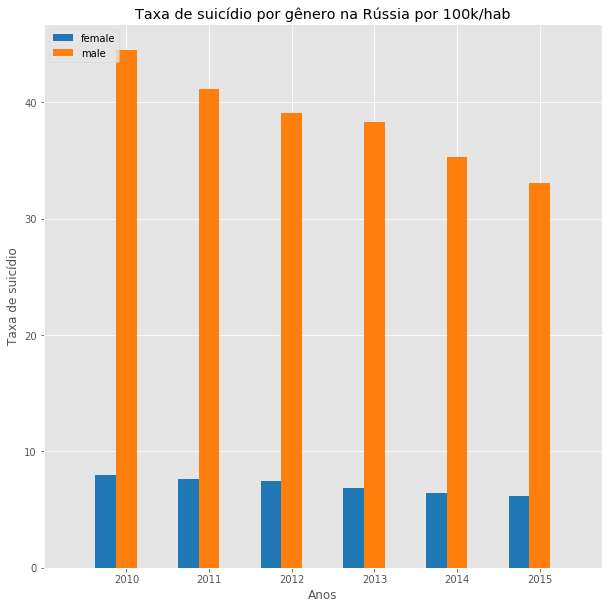

In [23]:
gerar_grafico_suicide_gen(gr, "Taxa de suicídio", "Anos", "Taxa de suicídio por gênero na Rússia por 100k/hab", 0.25)

In [39]:
def gerar_grafico_suicide_total(df, axis_y, axis_x, title,wd = 0.15):
    global list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name)) 
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list((df["suicides_no"][df["country"] == country_name[index]]/df["totalPopulation"][df["country"] == country_name[index]])*100000)
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper right")


    plt.show()

In [52]:
def gerar_grafico_idh_total(df, axis_y, axis_x, title,wd = 0.15):
    global list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name))
    plt.xlim(country_year[0]+(wd*(list_num[0]-11)), country_year[-1]+(wd*(list_num[-1]+2)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_hdi = list(df["hdi"][df["country"] == country_name[index]])
        country_hdi = np.asarray(country_hdi)
        ax.bar(country_year+(wd*list_num[index]), country_hdi, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper left")


    plt.show() 

In [76]:
def gerar_grafico_suicide_gdp_pc(df, axis_y, axis_x, title,wd = 0.15):
    global list_colors
    
    plt.ylabel(axis_y)
    plt.xlabel(axis_x)
    plt.title(title)
    ax = plt.subplot()
    
    country_name = list(df["country"].unique())
    year_df = list(df["year"].unique())
    country_year = np.asarray(year_df)
    
    list_num = axis_x_center(len(country_name)) 
    plt.xlim(country_year[0]+(wd*(list_num[0]-3)), country_year[-1]+(wd*(list_num[-1]+3)))
    plt.xticks(country_year)
    
    for index in range(len(country_name)):
        country_list = list((df[" gdp-year"][df["country"] == country_name[index]]/df["totalPopulation"][df["country"] == country_name[index]]))
        country_list = np.asarray(country_list)
        ax.bar(country_year+(wd*list_num[index]), country_list, width=wd, align="center", label=country_name[index], color=list_colors[index])
        ax.legend(loc="upper right")


    plt.show()

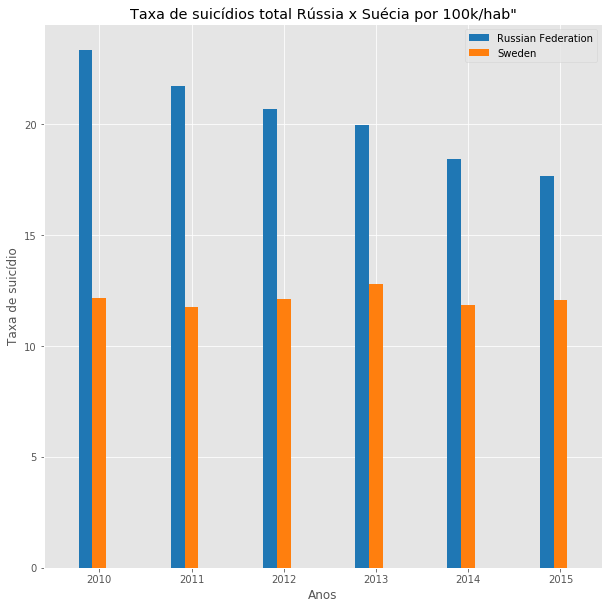

In [26]:
gerar_grafico_suicide_total(myGroup_sum, 'Taxa de suicídio', 'Anos', 'Taxa de suicídios total Rússia x Suécia por 100k/hab')

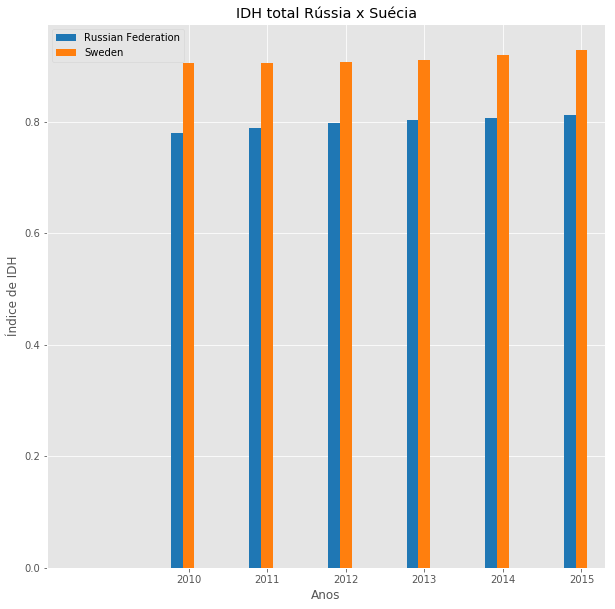

In [54]:
gerar_grafico_idh_total(myGroup_sum, "Índice de IDH", "Anos", "IDH total Rússia x Suécia")

TypeError: unsupported operand type(s) for /: 'str' and 'float'

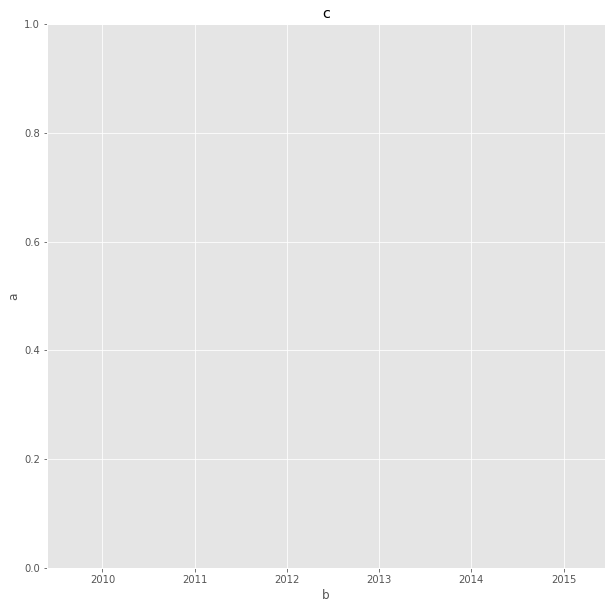

In [77]:
gerar_grafico_suicide_gdp_pc(myGroup,"a","b","c")